In [31]:
import csv
import pandas as pd
import numpy as np
import datetime # datetime會用到
import matplotlib.pyplot as plt #畫圖用到
from pandas import DataFrame 


#Unnamed:0,交易日期,交易金額,會員名稱,會員編號,營業點,營業點名稱
file = '20070311-20190731.csv'
df = pd.read_csv(file,index_col=0, low_memory=False)
DataFrame = DataFrame(df,columns = ['交易日期','會員編號']) #抓那兩種，放到DataFrame

DataFrame.drop_duplicates(DataFrame,inplace=True) #刪除兩種都重複資料
DataFrame = DataFrame.dropna() #刪 NaN
DataFrame = DataFrame.sort_values(by=['會員編號','交易日期'],ascending=[True,True]) #資料排序依照會員編號小到大，再排日期由小到大(太神啦!!)
DataFrame.reset_index(inplace=True) #更新索引值


#DataFrame

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [32]:
def AvgBuyWeek(i):
    global times #購買次數
    global upDay #第一天
    global nextDay #明天
    global member #紀錄會員編號
    global Interval #最後一天 - upDay
    global temp #暫存值
    global CAI
    global count
    up = DataFrame['會員編號'][i] 
    down = DataFrame['會員編號'][i+1]
    if temp != up: #紀錄遇見不重複會員編號跳出
        d1 = DataFrame['交易日期'][i]
        d2 = DataFrame['交易日期'][i+1]
        upDay = datetime.datetime(d1//10000,(d1%10000-d1%100)//100,d1%100)    
        if up == down: #這筆和下一筆相同   
            nextDay = datetime.datetime(d2//10000,(d2%10000-d2%100)//100,d2%100)
            Interval += (nextDay-upDay).days #兩天相減加到Interval
            times+=1
            count += times
            CAI += ((nextDay-upDay).days * times)
            if times == 1: #紀錄第一天
                lists['First time'].append(upDay)
            AvgBuyWeek(i+1)      
        else:
            member = up
            temp = member
            if count != 0:
                CAI = CAI / count
                d3 = DataFrame['交易日期'][i-1]
                SecondLastDay = datetime.datetime(d3//10000,(d3%10000-d3%100)//100,d3%100)    
                lists['Second Last time'].append(SecondLastDay)
print('ok')

ok


In [33]:
upDay= 1
nextDay = 1
temp = ''
lists = {'Member':[],'First time':[],'Second Last time':[],'Last time':[],'times':[],'Interval':[],'Interval/(times-1)':[],
         'Last time - Second Last time':[],'R.T.':[],'CAI':[]}

for i in DataFrame.shape:
    j = i
    break  
print(j)

for i in range(0,j-1):
#for i in range(0,200):
    times = 0
    member = ''
    Interval = 0
    CAI = 0
    count = 0
    AvgBuyWeek(i)
    if(times >= 1 and member!= '' and Interval >= 0 ): 
        lists['Member'].append(member)
        lists['Interval/(times-1)'].append('%0.1f'%(Interval/times))            
        lists['times'].append(times+1)
        lists['Interval'].append(Interval)
        lists['Last time'].append(nextDay)      
        
        a = len(lists['Last time'])-1
        pk = (lists['Last time'][a] - lists['Second Last time'][a]).days
        lists['Last time - Second Last time'].append(pk)
        if lists['Interval/(times-1)'][a] == 0:
            lists['R.T.'].append(0)
            lists['CAI'].append(0)
        else:
            lists['R.T.'].append(lists['Last time - Second Last time'][a]/(float)(lists['Interval/(times-1)'][a]))
            lists['CAI'].append(1-(CAI/(float)(lists['Interval/(times-1)'][a])))
CAIAct = 0
CAINor = 0
CAISle = 0
for j in range(len(lists['Member'])):
    if lists['CAI'][j] > 0:
        CAIAct += 1
    elif lists['CAI'][j] == 0:
        CAINor += 1
    else:
        CAISle += 1
        
print('ok')

1125764
ok


In [34]:
new = pd.DataFrame(lists)
str1='客戶活躍度與購買週期圖_{0}.xlsx'.format(file[0:17])
new.to_excel(str1,encoding='utf-8',index=False,columns=lists,sheet_name='客戶活躍度與購買週期圖')

print('ok')

ok


In [35]:
import openpyxl
from openpyxl import load_workbook
from openpyxl.styles import colors, Font, Fill, NamedStyle
from openpyxl.styles import PatternFill, Border, Side, Alignment
wb=openpyxl.load_workbook(str1)
TotalChooseMember = j

#第一頁
#wb.create_sheet(title='客戶活躍度與購買週期圖')
page1 = wb['客戶活躍度與購買週期圖']

sheet = wb.active

redFill = PatternFill(start_color='F08080',end_color='F08080',fill_type='solid')
yellowFill = PatternFill(start_color='FFF68F',end_color='FFF68F',fill_type='solid')
blueFill = PatternFill(start_color='CAE1FF',end_color='CAE1FF',fill_type='solid')
#CAI塗色
for i in range(2,len(lists['CAI'])+2):
    if sheet['J{0}'.format(i)].value > 0:
        sheet['J{0}'.format(i)].fill = blueFill
    elif sheet['J{0}'.format(i)].value == 0:
        sheet['J{0}'.format(i)].fill = yellowFill
    else:
        sheet['J{0}'.format(i)].fill = redFill

sheet['M1'] = '人數'
sheet['N1'] = '百分比'

sheet['L2'] = 'CAI>0'
sheet['L2'].fill = blueFill
sheet['M2'] = CAIAct             #人數
temp = '%0.3f'%(CAIAct/TotalChooseMember*100) #%
sheet['N2'] = '{0}%'.format(temp)


sheet['L3'] = 'CAI=0'
sheet['L3'].fill = yellowFill
sheet['M3'] = CAINor
temp = '%0.3f'%(CAINor/TotalChooseMember*100)
sheet['N3'] ='{0}%'.format(temp)


sheet['L4'] = 'CAI<0'
sheet['L4'].fill = redFill
sheet['M4'] = CAISle
temp = '%0.3f'%(CAISle/TotalChooseMember*100)
sheet['N4'] ='{0}%'.format(temp)

sheet['M5'] = CAISle + CAIAct +CAINor
temp = '%0.2f'%((CAISle + CAIAct +CAINor)/TotalChooseMember*100)
sheet['N5'] ='{0}%'.format(temp)

#///////////////////////////////////////////////////////////////////
#第二頁
wb.create_sheet(title='Statistics')
page2 = wb['Statistics']
bian = Side(style='medium',color='000000')
border = Border(bottom=bian)
page2.append(['Member','會員編號'])
page2.append(['First time','會員第一次購買時間'])
page2.append(['Last time','會員最後購買時間'])
page2.append(['times','購買總次數'])
page2.append(['Interval','Last time - First time，總天數'])
page2.append(['Interval/(times-1)','平均幾天購買一次'])
page2.append(['Last time - Second Last time','最後一天減倒數第二天'])
page2.append(['R.T.','購物週期倍數 : (Last time - Second Last time)/Interval/(times-1)'])
page2.append(['CAI','顧客活躍度 : 1-加權平均消費週期/平均消費週期'])
#///////////////////////////////////////////////////////////////////

wb.save(str1)
wb.close()
print(wb.get_sheet_names())

['客戶活躍度與購買週期圖', 'Statistics']


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).


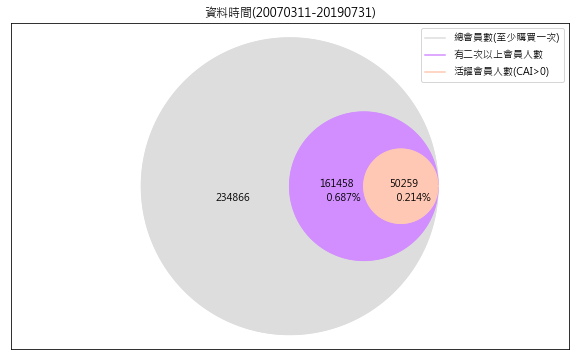

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  #改正中文亂碼(來源:https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)
plt.rcParams['axes.unicode_minus'] = False
# ==========================================
# 圓的基本資訊
# 1.圓半徑
r = 10.0
# 2.圓心座標
a, b = (0., 0.)
# ==========================================畫圓
theta = np.arange(0, 2*np.pi, 0.01)
x = a + r * np.cos(theta)
y = b + r * np.sin(theta)
x2= a + r * np.cos(theta)/2+5
y2= b + r * np.sin(theta)/2
x3= a + r * np.cos(theta)/4+7.5
y3= b + r * np.sin(theta)/4 

fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)

plt.fill(x,y,color='#DDDDDD') #填滿圓
plt.text(-5,-1,'{0}'.format(234866), fontsize=10)
axes.plot(x, y,label='總會員數(至少購買一次)',color='#DDDDDD')

plt.fill(x2,y2,color='#D28EFF')
plt.text(2,-1,'{0}\n   {1}%'.format(j,'%0.3f'%(j/234866)), fontsize=10)
axes.plot(x2, y2,label='有二次以上會員人數',color='#D28EFF')

plt.fill(x3,y3,color='#FFC8B4')
plt.text(6.7,-1,'{0}\n   {1}%'.format(CAIAct,'%0.3f'%(CAIAct/234866)), fontsize=10)
axes.plot(x3, y3,label='活耀會員人數(CAI>0)',color='#FFC8B4')

plt.title(r"資料時間({0})".format(file[0:17]))
axes.axis('equal')
# ==========================================

# ==========================================
plt.xticks([]) #去座標
plt.yticks([])
plt.legend()
plt.savefig('蛋黃圖{0}.png'.format(file[0:17], dpi=400))
plt.show()